## Visualizaciones de los datos

In [43]:
# Nos importamos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import colormaps

In [17]:
# Código para poder visualizar todas las columnas de los df
pd.set_option('display.max_columns', None)

In [24]:
datos_completos = pd.read_csv("datos_completos.csv")
datos_completos.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Is_Active,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,True,2017,1,3,0,3,1521,152,0,0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,True,2017,2,2,2,4,1320,132,0,0
2,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,True,2018,10,6,4,10,3110,311,385,31
3,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,True,2017,4,4,0,4,924,92,0,0
4,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,True,2017,5,0,0,0,0,0,0,0


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
    - Usammos un barplot donde tengamos dos barras (una por año), abajo el mes y a la izquierda el número de vuelos reservados.

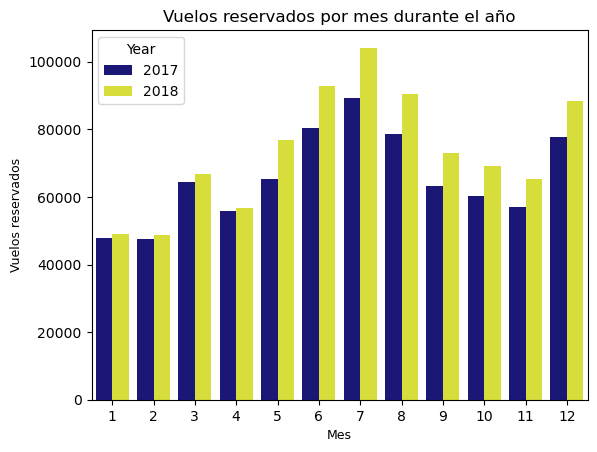

In [48]:
# Hacemos una variable nueva con groupby para sumar por mes y año.
vuelos_por_mes = datos_completos.groupby(["Year", "Month"])["Flights Booked"].sum().reset_index()

sns.barplot(x = "Month", 
              y = "Flights Booked",
              data = vuelos_por_mes, 
              palette = "plasma", 
              hue = "Year")
plt.title("Vuelos reservados por mes durante el año")
plt.xlabel("Mes", fontsize = 9)
plt.ylabel("Vuelos reservados",  fontsize = 9); 


Podemos observar que en 2018 (barra amarilla) hay más reservas todos los meses y que se reservan más vuelo en los meses de verano y diciembre.